In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
data = pd.read_csv('clean_data.csv')
data


,song_name,artist_name,played_at,timestamp
0,I See the Light,Ben E. King,2021-08-28T17:14:33.930Z,2021-08-28
1,Let Me Live in Your Life,Ben E. King,2021-08-28T17:13:55.877Z,2021-08-28
2,Stand by Me,Ben E. King,2021-08-28T17:13:33.302Z,2021-08-28
3,"Stand By Me - DJ ""D.O.C."" Remix",Ben E. King,2021-08-28T17:12:50.194Z,2021-08-28
4,Seven Nation Army,Scott Rill,2021-08-28T17:12:03.221Z,2021-08-28
5,Knockin' On Heaven's Door,Bob Dylan,2021-08-28T17:11:56.641Z,2021-08-28
6,Can't Say No,The Helio Sequence,2021-08-28T17:11:46.727Z,2021-08-28
7,Soldier,NEFFEX,2021-08-28T14:18:52.131Z,2021-08-28
8,Smoke On The Water - Remastered 2012,Deep Purple,2021-08-28T14:11:54.096Z,2021-08-28
9,Bohemian Rhapsody - Remastered 2011,Queen,2021-08-28T14:11:48.968Z,2021-08-28


In [5]:
# barr = data.groupby(['artist_name'])['song_name'].count().sort_values(['song_name'], ascending=False)
barr = data.groupby('artist_name').count().sort_values(['song_name'], ascending=False).head(10)

<AxesSubplot:title={'center':'Most Played Artists'}, xlabel='Artists', ylabel='Number of songs'>

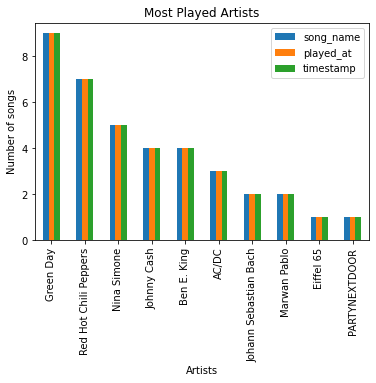

In [6]:
barr.plot(kind='bar', title='Most Played Artists', ylabel='Number of songs',
         xlabel='Artists')

In [7]:
dashFrame = data.groupby(['artist_name'])['song_name'].count().sort_values(ascending=False)
dashFrame

artist_name
Green Day                 9
Red Hot Chili Peppers     7
Nina Simone               5
Johnny Cash               4
Ben E. King               4
AC/DC                     3
Marwan Pablo              2
Johann Sebastian Bach     2
Run River North           1
Elvis Presley             1
The Clash                 1
Bob Dylan                 1
Chloe Foy                 1
Deep Purple               1
Depeche Mode              1
Eiffel 65                 1
Ella Fitzgerald           1
Guitar Tribute Players    1
Scott Rill                1
Queen                     1
Gyrgy Kurtg               1
The Helio Sequence        1
Kings of Convenience      1
NEFFEX                    1
Scorpions                 1
PARTYNEXTDOOR             1
William McVicker          1
Name: song_name, dtype: int64